# Exercise - Classification of Survived Passengers on Titanic Dataset

The 'titanic-train.csv' contains data of passenger details aboard the titanic, and whether they survived or not. We have to make a model which will predict their survival. The features are as follows:  

Survived - Survival (0 = No; 1 = Yes)  
Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)  
Name - Name  
Sex - Sex  
Age - Age  
SibSp - Number of Siblings/Spouses Aboard  
Parch - Number of Parents/Children Aboard  
Ticket - Ticket Number  
Fare - Passenger Fare (British pound)  
Cabin - Cabin  
Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)  

## Solve the following questions:
1. Based on logical reasoning, decide which variables are absolutely not required or relevant to the model. List them down and drop those columns. 
2. Plot a bar chart of the survived column. 
3. Plot a bar chart of the number of females who survived and not, and similarly males who survived and not. 
4. Plot a stacked bar chart of survived or not based on PClass(i.e how many survived and not for 1st, 2nd and 3rd class). The graph can be made by referring to https://matplotlib.org/examples/pylab_examples/bar_stacked.html
5. Check if there are missing values in any columns. Remove such rows in the dataset.  
6. Convert categorical values (if any) to numbers in the dataset.
7. Plot a heatmap of the correlation between all columns. There are columns are inter-related. Which are those colums? Can you drop either one of the inter-related column before proceeding ahead?
8. Now split your dataset into training & testing dataset with 80:20 ratio using train_test_split function. Use a random state which will give an approximately equal number of survived and non survived rows in the training test. Validate using a bar chart on the training dataset. 

## Decision Tree Modelling
#### Use a decision tree classifier with a maximum depth of 6, to train your model. Obtain the decision tree & confusion matrix for the predictions. Obtain the score of the model.

## Perceptron Modelling
#### Use a perceptron model with a max_iter value 400, to train your model. Obtain the confusion matrix for the predictions. Obtain the score of the model. 

## Which of the two models fairs better? 


### BONUS(1%)
There is a relation between age and PClass. Can you fill in the missing values of age with this information instead of dropping the rows entirely? You will have to justify with some data analysis and visulization.

In [1]:
import pandas as pd

In [2]:
titanic = pd.read_csv("titanic-train.csv")
titanic.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Based on logical reasoning, decide which variables are absolutely not required or relevant to the model. List them down and drop those columns.

In [3]:
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [4]:
newtitanic=titanic[['Pclass','Fare']]
newtitanic.head()

,Pclass,Fare
0,3,7.2500
1,1,71.2833
2,3,7.9250
3,1,53.1000
4,3,8.0500


## Plot a bar chart of the survived column.

In [5]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [6]:
import matplotlib.pyplot as plt
plt.bar(range(0,2),titanic['Survived'].value_counts(),width=0.1)

<BarContainer object of 2 artists>

## Plot a bar chart of the number of females who survived and not, and similarly males who survived and not. 

<BarContainer object of 2 artists>

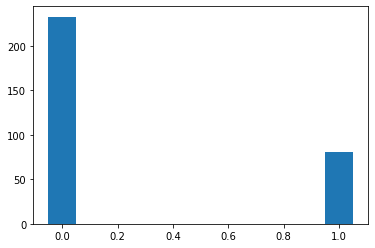

In [7]:
fetitanic=titanic[titanic['Sex']=='female']
plt.bar(range(0,2),fetitanic['Survived'].value_counts(),width=0.1)

<BarContainer object of 2 artists>

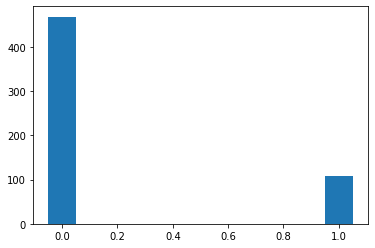

In [8]:
matitanic=titanic[titanic['Sex']=='male']
plt.bar(range(0,2),matitanic['Survived'].value_counts(),width=0.1)

## Plot a stacked bar chart of survived or not based on PClass(i.e how many survived and not for 1st, 2nd and 3rd class). The graph can be made by referring to https://matplotlib.org/examples/pylab_examples/bar_stacked.html

<BarContainer object of 2 artists>

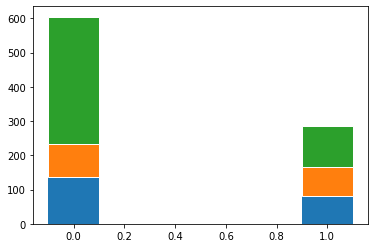

In [9]:
import numpy as np
pc1=titanic[titanic['Pclass']==1]
pc2=titanic[titanic['Pclass']==2]
pc3=titanic[titanic['Pclass']==3]
plt.bar(range(0,2),list(pc1['Survived'].value_counts()),width=0.2)
plt.bar(range(0,2),list(pc2['Survived'].value_counts()),width=0.2,bottom=list(pc1['Survived'].value_counts()),edgecolor='white')
plt.bar(range(0,2),list(pc3['Survived'].value_counts()),width=0.2,bottom=list(np.add(pc1['Survived'].value_counts(),pc2['Survived'].value_counts())),edgecolor='white')

In [10]:
import numpy as np
np.add(pc1['Survived'].value_counts(),pc2['Survived'].value_counts())

1    233
0    167
Name: Survived, dtype: int64

In [11]:
list(pc1['Survived'].value_counts())

[136, 80]

In [12]:
list(pc2['Survived'].value_counts())

[97, 87]

In [13]:
list(pc3['Survived'].value_counts())

[372, 119]

## Check if there are missing values in any columns. Remove such rows in the dataset. 

In [14]:
titanic[titanic['Age'].isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [15]:
titanic[titanic['Cabin'].isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [16]:
titanic[titanic['Embarked'].isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [17]:
dubtititanic=titanic.dropna(subset=['Age'])
dubtititanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
dubtititanic=dubtititanic.dropna(subset=['Cabin'])
dubtititanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [19]:
dubtititanic=dubtititanic.dropna(subset=['Embarked'])
dubtititanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


## Convert categorical values (if any) to numbers in the dataset.

In [20]:
mapping={'male':0,'female':1}
dubtititanic['Gender']=dubtititanic['Sex'].apply(lambda x:mapping[x])
dubtititanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,1
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,1


In [21]:
mapping={'C':0,'S':1,'Q':2}
dubtititanic['port']=dubtititanic['Embarked'].apply(lambda x:mapping[x])
dubtititanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,port
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,1,1
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,1,1


## Plot a heatmap of the correlation between all columns. There are columns are inter-related. Which are those colums? Can you drop either one of the inter-related column before proceeding ahead?

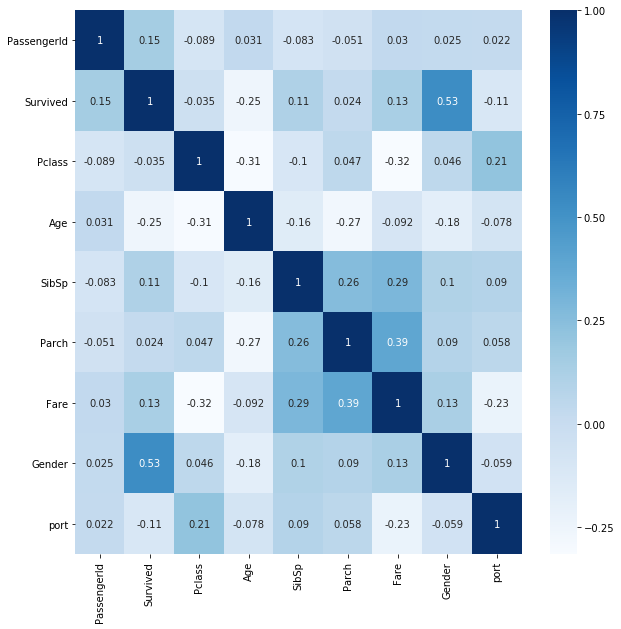

In [22]:
import seaborn
plt.figure(figsize=[10,10])
seaborn.heatmap(dubtititanic.corr(),annot=True,cmap='Blues')

## Now split your dataset into training & testing dataset with 80:20 ratio using train_test_split function. Use a random state which will give an approximately equal number of survived and non survived rows in the training test. Validate using a bar chart on the training dataset. 

In [23]:
newtitanic=dubtititanic[['Gender','Age','Survived']]
newtitanic.head()

,Gender,Age,Survived
1,1,38.0,1
3,1,35.0,1
6,0,54.0,0
10,1,4.0,1
11,1,58.0,1


In [24]:
newtitanic['Survived'].value_counts()

1    123
0     60
Name: Survived, dtype: int64

In [25]:
yo=newtitanic[newtitanic['Survived']==1][:60]
bo=newtitanic[newtitanic['Survived']==0]
yo=yo.append(bo)
yo['Survived'].value_counts()

1    60
0    60
Name: Survived, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(yo[['Gender','Age']],yo['Survived'],test_size=0.2,random_state=3)

In [27]:
y_train.value_counts()

0    49
1    47
Name: Survived, dtype: int64

<BarContainer object of 2 artists>

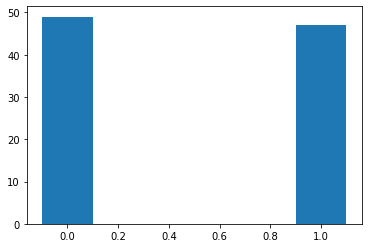

In [28]:
plt.bar(range(0,2),y_train.value_counts(),width=0.2)

#### Decision Tree Modelling
- Use a decision tree classifier with a maximum depth of 6, to train your model. Obtain the decision tree & confusion matrix for the predictions. Obtain the score of the model.

In [29]:
from sklearn.tree import DecisionTreeClassifier
decisiontree=DecisionTreeClassifier(criterion='entropy',max_depth=6)
obtained_tree=decisiontree.fit(x_train,y_train)

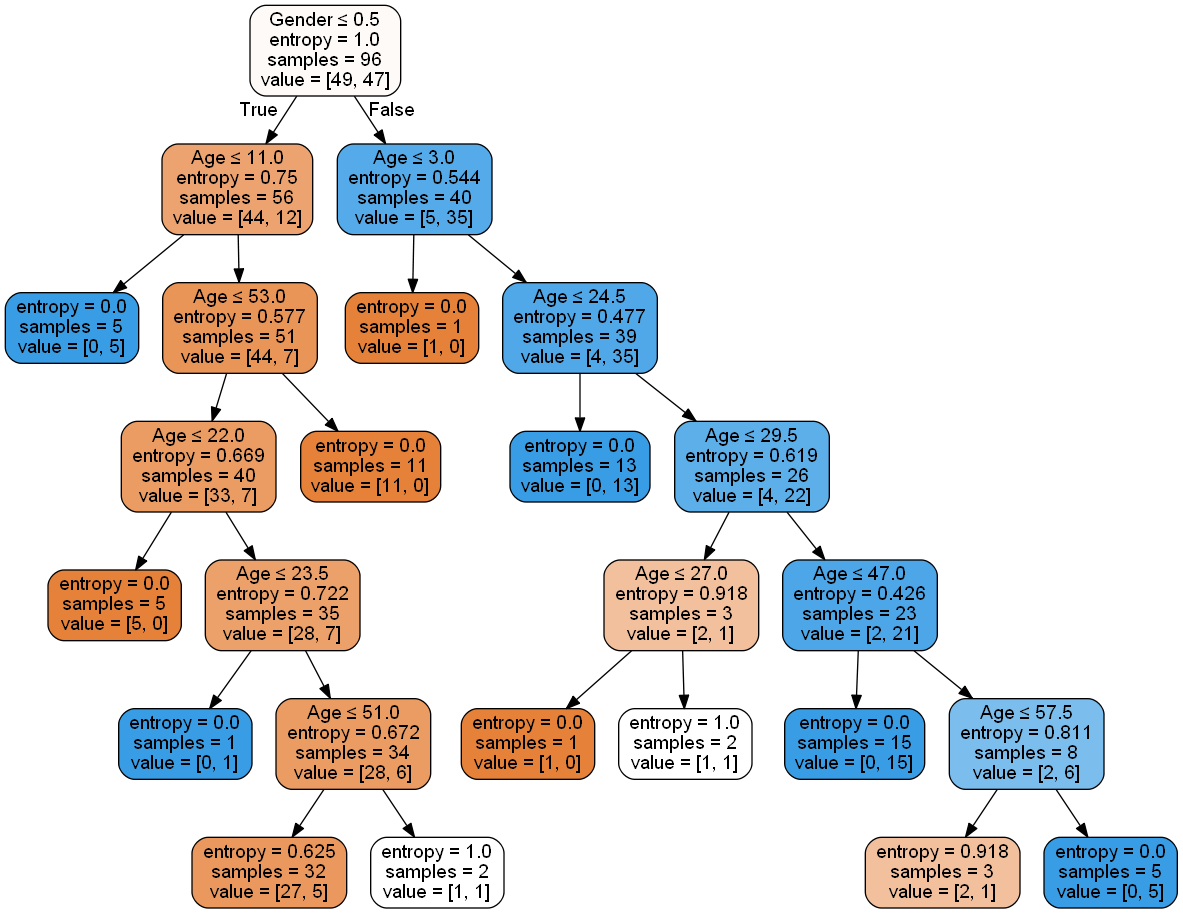

In [30]:
import os
os.environ['Path']+=os.pathsep+'C://Program Files (x86)\Graphviz2.38\\bin'
from sklearn.tree import export_graphviz
from io import StringIO
import pydotplus
from IPython.display import Image
DecisionTreeImg=StringIO()
export_graphviz(obtained_tree,out_file=DecisionTreeImg,filled=True,rounded=True,
                feature_names=['Gender','Age'],special_characters=True)
graph=pydotplus.graph_from_dot_data(DecisionTreeImg.getvalue())
Image(graph.create_png())

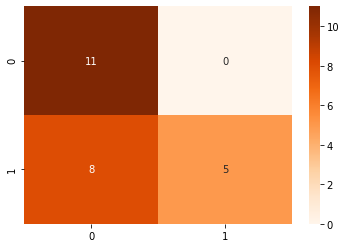

In [31]:
from sklearn.metrics import confusion_matrix
actual=y_test
pred=obtained_tree.predict(x_test)
import seaborn
seaborn.heatmap(confusion_matrix(actual,pred),annot=True,cmap="Oranges",xticklabels=decisiontree.classes_
               ,yticklabels=decisiontree.classes_)

In [32]:
print('accuracy is ',decisiontree.score(x_test,y_test)) #r2 score

accuracy is  0.6666666666666666


#### Perceptron Modelling
- Use a perceptron model with a max_iter value 400, to train your model. Obtain the confusion matrix for the predictions.
- Obtain the score of the model.

In [33]:
from sklearn.linear_model import Perceptron
classifier =Perceptron(max_iter=400)
model=classifier.fit(x_train,y_train)

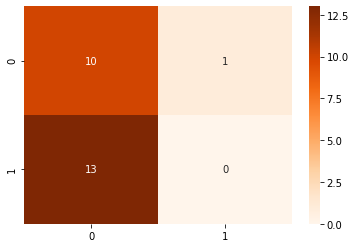

In [34]:
pred=model.predict(x_test)
seaborn.heatmap(confusion_matrix(actual,pred),annot=True,cmap="Oranges",xticklabels=model.classes_
               ,yticklabels=model.classes_)

In [35]:
print('accuracy is ',model.score(x_test,y_test)) #r2 score

accuracy is  0.4166666666666667


## Decision Tree is Better

#### There is a relation between age and PClass. Can you fill in the missing values of age with this information instead of dropping the rows entirely? You will have to justify with some data analysis and visulization. 

In [36]:
udtititanic=titanic.dropna(subset=['Cabin'])
udtitanic=udtititanic.dropna(subset=['Embarked'])

In [37]:
udtitanic[udtitanic['Age'].isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
128,129,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,C
166,167,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,NaN,0,1,113505,55.0000,E33,S
185,186,0,1,"Rood, Mr. Hugh Roscoe",male,NaN,0,0,113767,50.0000,A32,S


In [38]:
udtitanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.111985,-0.084147,0.030933,-0.081137,-0.064538,0.017465
Survived,0.111985,1.000000,-0.030513,-0.254085,0.138202,0.042456,0.128261
Pclass,-0.084147,-0.030513,1.000000,-0.306514,-0.086972,0.056288,-0.311740
Age,0.030933,-0.254085,-0.306514,1.000000,-0.156162,-0.271271,-0.092424
SibSp,-0.081137,0.138202,-0.086972,-0.156162,1.000000,0.262348,0.291777
Parch,-0.064538,0.042456,0.056288,-0.271271,0.262348,1.000000,0.384970
Fare,0.017465,0.128261,-0.311740,-0.092424,0.291777,0.384970,1.000000


In [39]:
mean=[]
for name,value in udtitanic.groupby(udtitanic['Pclass']):
    print(name)
    mean.append(value['Age'].mean())
    print(mean[name-1])
    print('******')
print(mean)

1
37.59126582278481
******
2
25.266666666666666
******
3
21.0
******
[37.59126582278481, 25.266666666666666, 21.0]


#### df.fillna(df['Age'].mean())

In [40]:
mk1=udtitanic[udtitanic['Pclass']==1]
mk1=mk1.fillna(mk1['Age'].mean())
mk2=udtitanic[udtitanic['Pclass']==2]
mk2=mk2.fillna(mk2['Age'].mean())
mk3=udtitanic[udtitanic['Pclass']==3]
mk3=mk3.fillna(mk3['Age'].mean())

In [41]:
mk85=mk1
mk85=mk85.append(mk2)
mk85=mk85.append(mk3)
mk85

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.000000,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.000000,0,0,113788,35.5000,A6,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.000000,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,37.591266,1,0,PC 17569,146.5208,B78,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.000000,1,0,PC 17572,76.7292,D33,C
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.000000,0,1,113509,61.9792,B30,C
55,56,1,1,"Woolner, Mr. Hugh",male,37.591266,0,0,19947,35.5000,C52,S


In [42]:
mk85.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.111985,-0.084147,0.031582,-0.081137,-0.064538,0.017465
Survived,0.111985,1.000000,-0.030513,-0.239911,0.138202,0.042456,0.128261
Pclass,-0.084147,-0.030513,1.000000,-0.324894,-0.086972,0.056288,-0.311740
Age,0.031582,-0.239911,-0.324894,1.000000,-0.152369,-0.268203,-0.080751
SibSp,-0.081137,0.138202,-0.086972,-0.152369,1.000000,0.262348,0.291777
Parch,-0.064538,0.042456,0.056288,-0.268203,0.262348,1.000000,0.384970
Fare,0.017465,0.128261,-0.311740,-0.080751,0.291777,0.384970,1.000000


In [44]:
mk85[mk85['Pclass']==1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.000000,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.000000,0,0,113788,35.5000,A6,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.000000,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,37.591266,1,0,PC 17569,146.5208,B78,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.000000,1,0,PC 17572,76.7292,D33,C
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.000000,0,1,113509,61.9792,B30,C
55,56,1,1,"Woolner, Mr. Hugh",male,37.591266,0,0,19947,35.5000,C52,S
